In [15]:
import os
import sys
sys.path.append('..')
sys.path.append('/Users/jh7685/Documents/Projects/pysurfer')
import pysurfer.freeview_helper as pyview
import numpy as np
import seaborn as sns
import matplotlib as mpl
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UserWarning)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Configurations

In [8]:
nsd_dir ='/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset'
output_dir='/Volumes/server/Projects/sfp_nsd/derivatives'
fs_subj_dir='/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer'
overlay_dir='/Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn'
fig_dir='/Volumes/server/Projects/sfp_nsd/derivatives/figures/brain_maps/nsdsyn'

sn_list = [f'subj{sn:02d}' for sn in np.arange(1,9)]

In [9]:
ret_colors = sns.color_palette('Blues_r', as_cmap=True)
ret_colors = np.round(ret_colors(np.linspace(0,1, 8)[::2])[:,0:3]*255).astype(int)
ret_colors = [np.asarray(ret_colors[k, :]) for k in range(3) for _ in range(2)] + [np.asarray(ret_colors[3,:])]

ffas_colors = [np.asarray([255,255,255]), np.asarray([255,255,255])]
ppa_color = [np.asarray([0,0,0])]

label_colors = ret_colors + ffas_colors + ppa_color

In [10]:
labels = ['V1v', 'V1d', 'V2v','V2d', 'V3v','V3d', 'hV4', 'FFA-1', 'FFA-2', 'PPA']
labels = [f'bin-min-0.5_probmap_{roi}_smooth.label' for roi in labels]

# Show Average sfp mask

In [22]:
surf='inflated'
overlay_custom_log = pyview.make_custom_color_palettes_for_overlay(plt.get_cmap('autumn'),
                                                               val_range=(1,128), n=100, log_scale=True)

In [23]:
sn='fsaverage'
overlay=f'sub-{sn}_value-mode_space-fsaverage_masked.mgz'
label_dir=f'/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/{sn}/label'
save_path = os.path.join(fig_dir, 'ss', f'ss_view-ventral_sub-{sn}_value-mode_space-fsaverage_masked.mgz')

lh_labels, lh_colors = pyview.get_subj_wise_labels('lh', labels, label_colors, label_dir)
lh_obj = pyview.PyFreeview(fs_subj_dir,
                           sn, 'lh', surf=surf,
                           overlay=overlay, overlay_dir=overlay_dir,
                           labels=lh_labels, label_dir=label_dir)

rh_labels, rh_colors = pyview.get_subj_wise_labels('rh', labels, label_colors, label_dir)
rh_obj = pyview.PyFreeview(fs_subj_dir,
                           sn, 'rh', surf=surf,
                           overlay=overlay, overlay_dir=overlay_dir,
                           labels=rh_labels, label_dir=label_dir,
                           view='inferior', cam_list=[1.25,0,-30,0], save_path=save_path)
fnl_cm = lh_obj.to_command(
    **{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom_log}) + ':offset=-60,0,0' + rh_obj.to_command(
    **{'label_colors': rh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom_log}).split('freeview')[-1] + ' -viewsize 1024 1024'
fnl_cm += ' -colorscale'
os.system(fnl_cm)

0

In [24]:
sn='fsaverage'
overlay=f'sub-{sn}_value-mode_space-fsaverage_masked.mgz'
label_dir=f'/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/{sn}/label'
save_path = os.path.join(fig_dir, 'ss', f'ss_view-posterior_sub-{sn}_value-mode_space-fsaverage_masked.mgz')

lh_labels, lh_colors = pyview.get_subj_wise_labels('lh', labels, label_colors, label_dir)
lh_obj = pyview.PyFreeview(fs_subj_dir,
                           sn, 'lh', surf=surf,
                           overlay=overlay, overlay_dir=overlay_dir,
                           labels=lh_labels, label_dir=label_dir)

rh_labels, rh_colors = pyview.get_subj_wise_labels('rh', labels, label_colors, label_dir)
rh_obj = pyview.PyFreeview(fs_subj_dir,
                           sn, 'rh', surf=surf,
                           overlay=overlay, overlay_dir=overlay_dir,
                           labels=rh_labels, label_dir=label_dir,
                           view='posterior', cam_list=[1.25,0,-25,0], save_path=save_path)
fnl_cm = lh_obj.to_command(
    **{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom_log}) + ':offset=-60,0,0' + rh_obj.to_command(
    **{'label_colors': rh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom_log}).split('freeview')[-1] + ' -viewsize 1024 1024'
fnl_cm += ' -colorscale'
os.system(fnl_cm)

0

# Show individual sfp map

In [26]:
labels = ['V1v', 'V1d', 'V2v','V2d', 'V3v','V3d', 'hV4', 'aFFA', 'pFFA', 'PPA']
labels = [f'{roi}.label' for roi in labels]

In [28]:
for sn in sn_list[2:]:
    overlay_file=f'sub-{sn}_value-mode_masked.mgz'
    label_dir=os.path.join(fs_subj_dir, sn, 'label')
    save_path = os.path.join(fig_dir, 'ss', f'ss_view-ventral_sub-{sn}_value-mode_masked.mgz')
    lh_labels, lh_colors = pyview.get_subj_wise_labels('lh', labels, label_colors, label_dir)
    lh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'lh', surf=surf, labels=lh_labels, label_dir=label_dir,
                               overlay=overlay_file, overlay_dir=overlay_dir)

    rh_labels, rh_colors = pyview.get_subj_wise_labels('rh', labels, label_colors, label_dir)
    rh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'rh', surf=surf, labels=rh_labels, label_dir=label_dir,
                               overlay=overlay_file, overlay_dir=overlay_dir,
                               view='inferior', cam_list=[1.25,0,-35,0], save_path=save_path)
    fnl_cm = lh_obj.to_command(
        **{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom_log}) + ':offset=-60,0,0' + rh_obj.to_command(
        **{'label_colors': rh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom_log}).split('freeview')[-1] + ' -viewsize 1024 1024'
    fnl_cm += ' -colorscale'
    os.system(fnl_cm)

NaN found at voxel (216748, 0, 0, 0)
NaN found at voxel (120420, 0, 0, 0)
NaN found at voxel (43, 0, 0, 0)
NaN found at voxel (36126, 0, 0, 0)
NaN found at voxel (96336, 0, 0, 0)
NaN found at voxel (132461, 0, 0, 0)
NaN found at voxel (228789, 0, 0, 0)
NaN found at voxel (204707, 0, 0, 0)
NaN found at voxel (108378, 0, 0, 0)
NaN found at voxel (180625, 0, 0, 0)
NaN found at voxel (192666, 0, 0, 0)
NaN found at voxel (192666, 0, 0, 0)


error: WARNING: 218588 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj03_value-mode_masked.mgz...

error: WARNING: 217427 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj03_value-mode_masked.mgz...



NaN found at voxel (34275, 0, 0, 0)
NaN found at voxel (114250, 0, 0, 0)
NaN found at voxel (80, 0, 0, 0)
NaN found at voxel (205647, 0, 0, 0)
NaN found at voxel (137100, 0, 0, 0)
NaN found at voxel (182799, 0, 0, 0)
NaN found at voxel (217071, 0, 0, 0)
NaN found at voxel (22850, 0, 0, 0)
NaN found at voxel (125675, 0, 0, 0)
NaN found at voxel (159950, 0, 0, 0)
NaN found at voxel (194223, 0, 0, 0)
NaN found at voxel (79975, 0, 0, 0)
NaN found at voxel (171375, 0, 0, 0)
NaN found at voxel (91400, 0, 0, 0)
NaN found at voxel (11431, 0, 0, 0)
NaN found at voxel (11431, 0, 0, 0)



error: WARNING: 207141 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj04_value-mode_masked.mgz...

error: WARNING: 204213 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj04_value-mode_masked.mgz...



NaN found at voxel (19763, 0, 0, 0)
NaN found at voxel (49400, 0, 0, 0)
NaN found at voxel (148199, 0, 0, 0)
NaN found at voxel (158078, 0, 0, 0)
NaN found at voxel (167957, 0, 0, 0)
NaN found at voxel (79040, 0, 0, 0)
NaN found at voxel (108680, 0, 0, 0)
NaN found at voxel (69160, 0, 0, 0)
NaN found at voxel (59280, 0, 0, 0)
NaN found at voxel (16, 0, 0, 0)
NaN found at voxel (187715, 0, 0, 0)
NaN found at voxel (9923, 0, 0, 0)
NaN found at voxel (29640, 0, 0, 0)
NaN found at voxel (29640, 0, 0, 0)



error: WARNING: 179767 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj05_value-mode_masked.mgz...

error: WARNING: 177288 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj05_value-mode_masked.mgz...



NaN found at voxel (2, 0, 0, 0)
NaN found at voxel (202910, 0, 0, 0)
NaN found at voxel (152184, 0, 0, 0)
NaN found at voxel (152184, 0, 0, 0)


error: WARNING: 236706 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj06_value-mode_masked.mgz...

error: WARNING: 236593 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj06_value-mode_masked.mgz...



NaN found at voxel (5, 0, 0, 0)
NaN found at voxel (119266, 0, 0, 0)
NaN found at voxel (119266, 0, 0, 0)


error: WARNING: 177633 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj07_value-mode_masked.mgz...

error: WARNING: 179012 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj07_value-mode_masked.mgz...



NaN found at voxel (0, 0, 0, 0)
NaN found at voxel (89748, 0, 0, 0)
NaN found at voxel (134620, 0, 0, 0)
NaN found at voxel (22438, 0, 0, 0)
NaN found at voxel (44876, 0, 0, 0)
NaN found at voxel (179492, 0, 0, 0)
NaN found at voxel (179492, 0, 0, 0)


error: WARNING: 213855 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj08_value-mode_masked.mgz...

error: WARNING: 212577 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj08_value-mode_masked.mgz...



In [29]:
for sn in sn_list:
    overlay_file=f'sub-{sn}_value-mode_masked.mgz'
    label_dir=os.path.join(fs_subj_dir, sn, 'label')
    save_path = os.path.join(fig_dir, 'ss', f'ss_view-posterior_sub-{sn}_value-mode_masked.mgz')
    lh_labels, lh_colors = pyview.get_subj_wise_labels('lh', labels, label_colors, label_dir)
    lh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'lh', surf=surf, labels=lh_labels, label_dir=label_dir,
                               overlay=overlay_file, overlay_dir=overlay_dir)

    rh_labels, rh_colors = pyview.get_subj_wise_labels('rh', labels, label_colors, label_dir)
    rh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'rh', surf=surf, labels=rh_labels, label_dir=label_dir,
                               overlay=overlay_file, overlay_dir=overlay_dir,
                               view='posterior', cam_list=[1.25,0,-25,0], save_path=save_path)
    fnl_cm = lh_obj.to_command(
        **{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom_log}) + ':offset=-60,0,0' + rh_obj.to_command(
        **{'label_colors': rh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_custom': overlay_custom_log}).split('freeview')[-1] + ' -viewsize 1024 1024'
    fnl_cm += ' -colorscale'
    os.system(fnl_cm)

NaN found at voxel (181617, 0, 0, 0)
NaN found at voxel (215670, 0, 0, 0)
NaN found at voxel (90810, 0, 0, 0)
NaN found at voxel (34055, 0, 0, 0)
NaN found at voxel (45406, 0, 0, 0)
NaN found at voxel (68, 0, 0, 0)
NaN found at voxel (22703, 0, 0, 0)
NaN found at voxel (136213, 0, 0, 0)
NaN found at voxel (136213, 0, 0, 0)


error: WARNING: 195641 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj01_value-mode_masked.mgz...

error: WARNING: 194545 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj01_value-mode_masked.mgz...



NaN found at voxel (1, 0, 0, 0)
NaN found at voxel (143784, 0, 0, 0)
NaN found at voxel (191709, 0, 0, 0)
NaN found at voxel (191709, 0, 0, 0)


error: WARNING: 207699 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj02_value-mode_masked.mgz...

error: WARNING: 202129 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj02_value-mode_masked.mgz...



NaN found at voxel (43, 0, 0, 0)
NaN found at voxel (192666, 0, 0, 0)
NaN found at voxel (96336, 0, 0, 0)
NaN found at voxel (144502, 0, 0, 0)
NaN found at voxel (48171, 0, 0, 0)
NaN found at voxel (48171, 0, 0, 0)



error: WARNING: 218588 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj03_value-mode_masked.mgz...

error: WARNING: 217427 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj03_value-mode_masked.mgz...



NaN found at voxel (182799, 0, 0, 0)
NaN found at voxel (137100, 0, 0, 0)
NaN found at voxel (80, 0, 0, 0)
NaN found at voxel (91400, 0, 0, 0)
NaN found at voxel (91400, 0, 0, 0)



error: WARNING: 207141 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj04_value-mode_masked.mgz...

error: WARNING: 204213 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj04_value-mode_masked.mgz...



NaN found at voxel (16, 0, 0, 0)
NaN found at voxel (158078, 0, 0, 0)
NaN found at voxel (118560, 0, 0, 0)
NaN found at voxel (118560, 0, 0, 0)


error: WARNING: 179767 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj05_value-mode_masked.mgz...

error: WARNING: 177288 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj05_value-mode_masked.mgz...



NaN found at voxel (2, 0, 0, 0)
NaN found at voxel (38046, 0, 0, 0)
NaN found at voxel (152184, 0, 0, 0)
NaN found at voxel (25364, 0, 0, 0)
NaN found at voxel (50728, 0, 0, 0)
NaN found at voxel (190229, 0, 0, 0)
NaN found at voxel (139502, 0, 0, 0)
NaN found at voxel (12686, 0, 0, 0)
NaN found at voxel (240953, 0, 0, 0)
NaN found at voxel (202910, 0, 0, 0)
NaN found at voxel (202910, 0, 0, 0)


error: WARNING: 236706 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj06_value-mode_masked.mgz...

error: WARNING: 236593 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj06_value-mode_masked.mgz...



NaN found at voxel (29817, 0, 0, 0)
NaN found at voxel (168956, 0, 0, 0)
NaN found at voxel (59634, 0, 0, 0)
NaN found at voxel (188832, 0, 0, 0)
NaN found at voxel (19878, 0, 0, 0)
NaN found at voxel (9939, 0, 0, 0)
NaN found at voxel (149080, 0, 0, 0)
NaN found at voxel (119266, 0, 0, 0)
NaN found at voxel (109328, 0, 0, 0)
NaN found at voxel (178894, 0, 0, 0)
NaN found at voxel (79512, 0, 0, 0)
NaN found at voxel (69573, 0, 0, 0)
NaN found at voxel (39756, 0, 0, 0)
NaN found at voxel (89451, 0, 0, 0)
NaN found at voxel (139142, 0, 0, 0)
NaN found at voxel (159018, 0, 0, 0)
NaN found at voxel (5, 0, 0, 0)
NaN found at voxel (5, 0, 0, 0)
, 0)


error: WARNING: 177633 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj07_value-mode_masked.mgz...

error: WARNING: 179012 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj07_value-mode_masked.mgz...



NaN found at voxel (179492, 0, 0, 0)
NaN found at voxel (213146, 0, 0, 0)
NaN found at voxel (201928, 0, 0, 0)
NaN found at voxel (0, 0, 0, 0)
NaN found at voxel (134620, 0, 0, 0)
NaN found at voxel (22438, 0, 0, 0)
NaN found at voxel (11219, 0, 0, 0)
NaN found at voxel (123402, 0, 0, 0)
NaN found at voxel (89748, 0, 0, 0)
NaN found at voxel (33657, 0, 0, 0)
NaN found at voxel (157056, 0, 0, 0)
NaN found at voxel (157056, 0, 0, 0)


error: WARNING: 213855 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/lh.sub-subj08_value-mode_masked.mgz...

error: WARNING: 212577 NaNs found in volume /Volumes/server/Projects/sfp_nsd/derivatives/sfp_maps/mgzs/nsdsyn/rh.sub-subj08_value-mode_masked.mgz...



# Save colorbar in log scale separately

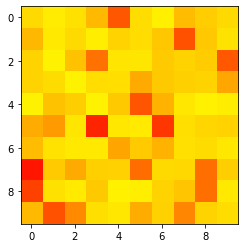

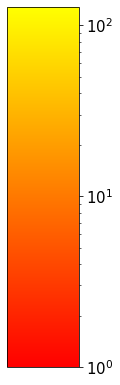

In [20]:
# Sample data
data = np.random.uniform(0.001, 100, size=(10, 10))

# Create a log scale color map
cmap = plt.cm.autumn
norm = mpl.colors.LogNorm(vmin=1, vmax=128)

# Plot the data with log scale color map
im = plt.imshow(data, cmap=cmap, norm=norm)

# Create a separate figure for the colorbar
fig_cb = plt.figure(figsize=(1, 5))  # Adjust the figure size as needed
cb_ax = fig_cb.add_axes([0, 0, 1, 1])  # Full height, full width

# Add the colorbar to the separate figure
cb = plt.colorbar(im, cax=cb_ax)
cb.ax.tick_params(axis='y', labelsize=15)
# Save the colorbar as an image
fig_cb.savefig(os.path.join(fig_dir, 'log_colorbar_image.png'), bbox_inches='tight')

In [49]:
thres=(0.1, 13)
overlay_custom=None
for sn in subj_list[1:2]:
    lh_labels = []
    lh_colors = []
    rh_labels = []
    rh_colors = []
    overlay=f'sub-{sn}_method-curvefit_value-mode.mgz'
    label_dir=f'/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/{sn}/label'
    output_path = os.path.join(fig_dir, f'ss_ang-ventral_sub-{sn}_method-curvefit_value-mode.png')
    for l, c in zip(labels, label_colors):
            if os.path.exists(os.path.join(label_dir, f'lh.{l}')):
                lh_labels.append(l)
                lh_colors.append(c)
            if os.path.exists(os.path.join(label_dir, f'rh.{l}')):
                rh_labels.append(l)
                rh_colors.append(c)
    lh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'lh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=lh_labels, label_dir=label_dir)
    rh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'rh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=rh_labels, label_dir=label_dir,
                               view='inferior', cam_list=[1.25,0,-30,0], save_path=output_path)
    fnl_cm = lh_obj.to_command(**{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_threshold':thres, 'overlay_color': 'colorwheel', 'overlay_custom': overlay_custom}) +  rh_obj.to_command(**{'label_colors': rh_colors,'label_opacity': 1, 'label_outline': True, 'overlay_color': 'colorwheel', 'overlay_custom': overlay_custom, 'overlay_threshold':thres}).split('freeview')[-1]
    fnl_cm = fnl_cm + ' -viewsize 1024 1024'
    os.system(fnl_cm)


In [51]:
thres=(0.5, 10)
overlay_custom=None
for sn in subj_list:
    lh_labels = []
    lh_colors = []
    rh_labels = []
    rh_colors = []
    overlay=f'sub-{sn}_method-curvefit_value-sigma.mgz'
    label_dir=f'/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/{sn}/label'
    output_path = os.path.join(fig_dir, f'ss_ang-ventral_sub-{sn}_method-curvefit_value-sigma.png')
    for l, c in zip(labels, label_colors):
            if os.path.exists(os.path.join(label_dir, f'lh.{l}')):
                lh_labels.append(l)
                lh_colors.append(c)
            if os.path.exists(os.path.join(label_dir, f'rh.{l}')):
                rh_labels.append(l)
                rh_colors.append(c)
    lh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'lh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=lh_labels, label_dir=label_dir)
    rh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'rh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=rh_labels, label_dir=label_dir,
                               view='inferior', cam_list=[1.25,0,-30,0], save_path=output_path)
    fnl_cm = lh_obj.to_command(**{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_threshold':thres, 'overlay_color': 'colorwheel', 'overlay_custom': overlay_custom}) +  rh_obj.to_command(**{'label_colors': rh_colors,'label_opacity': 1, 'label_outline': True, 'overlay_color': 'colorwheel', 'overlay_custom': overlay_custom, 'overlay_threshold':thres}).split('freeview')[-1]
    fnl_cm = fnl_cm + ' -viewsize 1024 1024'
    os.system(fnl_cm)


In [52]:
thres=(1, 10)
overlay_custom=None
for sn in subj_list:
    lh_labels = []
    lh_colors = []
    rh_labels = []
    rh_colors = []
    overlay=f'sub-{sn}_method-curvefit_value-amp.mgz'
    label_dir=f'/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/{sn}/label'
    output_path = os.path.join(fig_dir, f'ss_ang-ventral_sub-{sn}_method-curvefit_value-amp.png')
    for l, c in zip(labels, label_colors):
            if os.path.exists(os.path.join(label_dir, f'lh.{l}')):
                lh_labels.append(l)
                lh_colors.append(c)
            if os.path.exists(os.path.join(label_dir, f'rh.{l}')):
                rh_labels.append(l)
                rh_colors.append(c)
    lh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'lh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=lh_labels, label_dir=label_dir)
    rh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'rh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=rh_labels, label_dir=label_dir,
                               view='inferior', cam_list=[1.25,0,-30,0], save_path=output_path)
    fnl_cm = lh_obj.to_command(**{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_threshold':thres, 'overlay_color': 'colorwheel', 'overlay_custom': overlay_custom}) +  rh_obj.to_command(**{'label_colors': rh_colors,'label_opacity': 1, 'label_outline': True, 'overlay_color': 'colorwheel', 'overlay_custom': overlay_custom, 'overlay_threshold':thres}).split('freeview')[-1]
    fnl_cm = fnl_cm + ' -viewsize 1024 1024'
    os.system(fnl_cm)


In [24]:
thres=(2,4)
overlay_custom=None
for sn in subj_list[:1]:
    lh_labels = []
    lh_colors = []
    rh_labels = []
    rh_colors = []
    overlay=f'sub-{sn}_stat-anova_value-F.mgz'
    label_dir=f'/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/{sn}/label'
    output_path = os.path.join(fig_dir, f'ss_ang-ventral_sub-{sn}_stat-anova_value-F.png')
    for l, c in zip(labels, label_colors):
            if os.path.exists(os.path.join(label_dir, f'lh.{l}')):
                lh_labels.append(l)
                lh_colors.append(c)
            if os.path.exists(os.path.join(label_dir, f'rh.{l}')):
                rh_labels.append(l)
                rh_colors.append(c)
    lh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'lh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=lh_labels, label_dir=label_dir)
    rh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'rh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=rh_labels, label_dir=label_dir,
                               view='inferior', cam_list=[1.25,0,-30,0], save_path=output_path)
    fnl_cm = lh_obj.to_command(**{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_threshold':thres, 'overlay_custom': overlay_custom}) +  rh_obj.to_command(**{'label_colors': rh_colors,'label_opacity': 1, 'label_outline': True, 'overlay_custom': overlay_custom, 'overlay_threshold':thres}).split('freeview')[-1]
    fnl_cm = fnl_cm + ' -viewsize 1024 1024'
    os.system(fnl_cm)


In [25]:

thres=(2,4)
overlay_custom=None
for sn in subj_list:
    lh_labels = []
    lh_colors = []
    rh_labels = []
    rh_colors = []
    overlay=f'sub-{sn}_stat-anova_value-F.mgz'
    label_dir=f'/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer/{sn}/label'
    output_path = os.path.join(fig_dir, f'ss_ang-occipital_sub-{sn}_stat-anova_value-F.png')
    for l, c in zip(labels, label_colors):
            if os.path.exists(os.path.join(label_dir, f'lh.{l}')):
                lh_labels.append(l)
                lh_colors.append(c)
            if os.path.exists(os.path.join(label_dir, f'rh.{l}')):
                rh_labels.append(l)
                rh_colors.append(c)
    lh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'lh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=lh_labels, label_dir=label_dir)
    rh_obj = pyview.PyFreeview(fs_subj_dir,
                               sn, 'rh', surf=surf,
                               overlay=overlay, overlay_dir=overlay_dir,
                               labels=rh_labels, label_dir=label_dir,
                               view='inferior', cam_list=None, save_path=output_path)
    fnl_cm = lh_obj.to_command(**{'label_colors': lh_colors,'label_opacity': 1, 'label_outline':  True, 'overlay_threshold':thres, 'overlay_custom': overlay_custom}) +  rh_obj.to_command(**{'label_colors': rh_colors,'label_opacity': 1, 'label_outline': True, 'overlay_custom': overlay_custom, 'overlay_threshold':thres}).split('freeview')[-1]
    fnl_cm = fnl_cm + ' -viewsize 1024 1024' + ' -view posterior -cam Elevation -25 Zoom 1.25'
    os.system(fnl_cm)
